<a href="https://colab.research.google.com/github/boemer00/stock/blob/main/rand_forest_model_sp500_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pandas_datareader as web
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, LSTM

from sklearn.ensemble import RandomForestClassifier


In [3]:
sp500 = web.DataReader('^GSPC',
                    data_source='yahoo',
                    start='1970-01-01',
                    end='2022-12-12')

sp500

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1970-01-02,93.540001,91.790001,0.000000,93.000000,8050000,93.000000
1970-01-05,94.250000,92.529999,0.000000,93.459999,11490000,93.459999
1970-01-06,93.809998,92.129997,0.000000,92.820000,11460000,92.820000
1970-01-07,93.379997,91.930000,0.000000,92.629997,10010000,92.629997
1970-01-08,93.470001,91.989998,0.000000,92.680000,10670000,92.680000
...,...,...,...,...,...,...
2022-12-06,4001.510010,3918.389893,3996.629883,3941.260010,4368380000,3941.260010
2022-12-07,3957.570068,3922.679932,3933.280029,3933.919922,4118050000,3933.919922
2022-12-08,3974.189941,3935.830078,3947.790039,3963.510010,4006900000,3963.510010


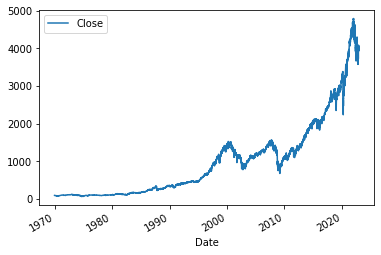

In [6]:
sp500.plot.line(y='Close', use_index=True);

In [8]:
# # cleaning columns not used for index
# del sp500['Dividends']
# del sp500['Stock Splits']

In [9]:
# setting up our target (price up or down --> direction)
# not focusing on absolute price!
sp500['Tomorrow'] = sp500['Close'].shift(-1)


In [10]:
# we have shifted the close price to a new column as if
# it predicts tomorrow's price
sp500.head(5)

,High,Low,Open,Close,Volume,Adj Close,Tomorrow
Date,,,,,,,
1970-01-02,93.540001,91.790001,0.0,93.000000,8050000,93.000000,93.459999
1970-01-05,94.250000,92.529999,0.0,93.459999,11490000,93.459999,92.820000
1970-01-06,93.809998,92.129997,0.0,92.820000,11460000,92.820000,92.629997
1970-01-07,93.379997,91.930000,0.0,92.629997,10010000,92.629997,92.680000
1970-01-08,93.470001,91.989998,0.0,92.680000,10670000,92.680000,92.400002


In [11]:
# target (is tomorrow's target greater than today'a price?)
# 1 if greater 0 if not greater
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)
sp500.head(3)

,High,Low,Open,Close,Volume,Adj Close,Tomorrow,Target
Date,,,,,,,,
1970-01-02,93.540001,91.790001,0.0,93.000000,8050000,93.000000,93.459999,1
1970-01-05,94.250000,92.529999,0.0,93.459999,11490000,93.459999,92.820000,0
1970-01-06,93.809998,92.129997,0.0,92.820000,11460000,92.820000,92.629997,0


In [12]:
# old data in stock market is not good because of market shifts
# let's remove old data
sp500 = sp500.loc['1990-01-01':].copy()

In [13]:
# train baseline model

In [14]:
from sklearn.ensemble import RandomForestClassifier

# difficult to overfit
# pick up non-linear relationship in the dataset (which is what happens in stocks)
model = RandomForestClassifier(n_estimators=100,
                               min_samples_split=100, # helps not overfitting,
                               random_state=1)

# train test split in time series
train = sp500.iloc[:-100]
test = sp500.iloc[-100]

predictors = ['Open', 'High', 'Low', 'Close', 'Volume']

model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [15]:
from sklearn.metrics import precision_score

preds = model.predict(train[predictors])
preds = pd.Series(preds, index=test.index) # convert from array to series
precision_score(test['Target'], preds)

ValueError: ignored

In [ ]:
pd.Series(preds)

In [ ]:
combined = pd.concat([test['Target'], preds], axis=1)
combined.plot()